In [19]:
import prolif as plf
import MDAnalysis as mda
import matplotlib.pyplot as plt
import networkx as nx
# Cargar la estructura de la proteína
#protein = mda.Universe("/Users/danielcondetorres/Desktop/GUARDA_PROYECTO/MMDR/Code/Prueba/receptor_clean.pdb")
protein =  mda.Universe("/Users/danielcondetorres/Desktop/GUARDA_PROYECTO/MMDR/Code/Output_Carlos/experiment_33_docking_files/3DKO.pdb") 
# Seleccionar los átomos de la proteína
protein_atoms = protein.select_atoms("protein")

# Modificar los identificadores de los residuos ANTES de crear el objeto Molecule
valor_constante = 0
for residuo in protein_atoms.residues:
    residuo.resid += valor_constante

# Crear el objeto Molecule de ProLIF a partir de la proteína modificada
protein_plf = plf.Molecule.from_mda(protein)

# Cargar las poses de los ligandos desde el archivo SDF
poses_plf = plf.sdf_supplier("/Users/danielcondetorres/Desktop/GUARDA_PROYECTO/MMDR/Code/Output_Carlos/experiment_33_docking_files/Abemaciclib.sdf")

# Inicializar el Fingerprint de ProLIF, configurando para contar todas las interacciones


fp = plf.Fingerprint(count=True, vicinity_cutoff=6.0)

# Generar el fingerprint de interacciones entre las poses de ligandos y la proteína modificada
fp.run_from_iterable(poses_plf, protein_plf)

# Generar el gráfico de interacciones (usará los residuos modificados)
#fp.plot_lignetwork(poses_plf[0])  # '0' indica la primera pose en la lista

 
from prolif.plotting.network import LigNetwork
pose_index = 0

# Genera la red de interacciones
lignetwork = LigNetwork.from_fingerprint(
    fp,
    ligand_mol=poses_plf[pose_index],
    kind="frame",  # O "aggregate" para una vista agregada
    frame=pose_index,
    display_all=False,
    threshold=0.6
)
#lignetwork.display()
fig, ax = lignetwork.draw()
fig.savefig("interacciones.png", dpi=300, bbox_inches="tight")

AttributeError: No hydrogen atom could be found in the topology, but the converter requires all hydrogens to be explicit. You can use the parameter ``NoImplicit=False`` when using the converter to allow implicit hydrogens and disable inferring bond orders and charges. You can also use ``force=True`` to ignore this error.

In [5]:
import prolif as plf
import MDAnalysis as mda
import matplotlib.pyplot as plt
import networkx as nx

# SOLUTION 1: Use NoImplicit=False (Recommended for most cases)
# This allows implicit hydrogens and disables bond order/charge inference
print("=== SOLUTION 1: Using NoImplicit=False ===")
try:
    # Load protein structure
    protein = mda.Universe("/Users/danielcondetorres/Desktop/GUARDA_PROYECTO/MMDR/Code/Output_Carlos/experiment_33_docking_files/3DKO.pdb") 
    
    # Select protein atoms
    protein_atoms = protein.select_atoms("protein")
    
    # Modify residue IDs
    valor_constante = 0
    for residuo in protein_atoms.residues:
        residuo.resid += valor_constante
    
    # Create ProLIF Molecule with NoImplicit=False
    protein_plf = plf.Molecule.from_mda(protein, NoImplicit=False)
    
    # Load ligand poses
    poses_plf = plf.sdf_supplier("/Users/danielcondetorres/Desktop/GUARDA_PROYECTO/MMDR/Code/Output_Carlos/experiment_33_docking_files/Abemaciclib.sdf")
    
    # Initialize Fingerprint
    fp = plf.Fingerprint(count=True, vicinity_cutoff=6.0)
    
    # Generate fingerprint
    fp.run_from_iterable(poses_plf, protein_plf)
    
    # Generate interaction network
    from prolif.plotting.network import LigNetwork
    pose_index = 0
    
    lignetwork = LigNetwork.from_fingerprint(
        fp,
        ligand_mol=poses_plf[pose_index],
        kind="frame",
        frame=pose_index,
        display_all=False,
        threshold=0.6
    )
    lignetwork.display()
    fig, ax = lignetwork.draw()
    plt.title("Solution 1: NoImplicit=False")
    plt.show()
    
    print("Solution 1 completed successfully!")
    
except Exception as e:
    print(f"Solution 1 failed: {e}")

print("\n" + "="*50 + "\n")

# SOLUTION 2: Use force=True (Use with caution)
# This ignores the hydrogen error but may affect interaction quality
print("=== SOLUTION 2: Using force=True ===")
try:
    # Reload universe
    protein = mda.Universe("/Users/danielcondetorres/Desktop/GUARDA_PROYECTO/MMDR/Code/Output_Carlos/experiment_33_docking_files/3DKO.pdb") 
    protein_atoms = protein.select_atoms("protein")
    
    valor_constante = 0
    for residuo in protein_atoms.residues:
        residuo.resid += valor_constante
    
    # Create ProLIF Molecule with force=True
    protein_plf = plf.Molecule.from_mda(protein, force=True)
    
    poses_plf = plf.sdf_supplier("/Users/danielcondetorres/Desktop/GUARDA_PROYECTO/MMDR/Code/Output_Carlos/experiment_33_docking_files/Abemaciclib.sdf")
    
    fp = plf.Fingerprint(count=True, vicinity_cutoff=6.0)
    fp.run_from_iterable(poses_plf, protein_plf)
    
    from prolif.plotting.network import LigNetwork
    pose_index = 0
    
    lignetwork = LigNetwork.from_fingerprint(
        fp,
        ligand_mol=poses_plf[pose_index],
        kind="frame",
        frame=pose_index,
        display_all=False,
        threshold=0.6
    )
    
    fig, ax = lignetwork.draw()
    plt.title("Solution 2: force=True")
    plt.show()
    
    print("Solution 2 completed successfully!")
    
except Exception as e:
    print(f"Solution 2 failed: {e}")

print("\n" + "="*50 + "\n")



# SOLUTION 4: Combined approach (Recommended)
# Uses NoImplicit=False with error handling
print("=== SOLUTION 4: Robust combined approach ===")
try:
    # Load protein structure
    protein = mda.Universe("/Users/danielcondetorres/Desktop/GUARDA_PROYECTO/MMDR/Code/Output_Carlos/experiment_33_docking_files/3DKO.pdb") 
    protein_atoms = protein.select_atoms("protein")
    
    # Modify residue IDs
    valor_constante = 0
    for residuo in protein_atoms.residues:
        residuo.resid += valor_constante
    
    # Try different approaches in order of preference
    protein_plf = None
    
    # First try: NoImplicit=False
    try:
        protein_plf = plf.Molecule.from_mda(protein, NoImplicit=False)
        print("Successfully created molecule with NoImplicit=False")
    except:
        # Second try: force=True
        try:
            protein_plf = plf.Molecule.from_mda(protein, force=True)
            print("Successfully created molecule with force=True")
        except:
            # Third try: both parameters
            protein_plf = plf.Molecule.from_mda(protein, NoImplicit=False, force=True)
            print("Successfully created molecule with both NoImplicit=False and force=True")
    
    if protein_plf is not None:
        # Load ligand poses
        poses_plf = plf.sdf_supplier("/Users/danielcondetorres/Desktop/GUARDA_PROYECTO/MMDR/Code/Output_Carlos/experiment_33_docking_files/Abemaciclib.sdf")
        
        # Initialize Fingerprint
        fp = plf.Fingerprint(count=True, vicinity_cutoff=6.0)
        
        # Generate fingerprint
        fp.run_from_iterable(poses_plf, protein_plf)
        
        # Generate interaction network
        from prolif.plotting.network import LigNetwork
        pose_index = 0
        
        lignetwork = LigNetwork.from_fingerprint(
            fp,
            ligand_mol=poses_plf[pose_index],
            kind="frame",
            frame=pose_index,
            display_all=False,
            threshold=0.6
        )
        #lignetwork.display()
        fig, ax = fp.plot_lignetwork()
        plt.title("Solution 4: Robust approach")
        plt.show()
        
        print("Solution 4 completed successfully!")
    else:
        print("Could not create ProLIF molecule with any method")
        
except Exception as e:
    print(f"Solution 4 failed: {e}")

print("\n=== RECOMMENDATIONS ===")
print("1. Solution 1 (NoImplicit=False) is recommended for most cases")
print("2. If you need precise bond orders/charges, use Solution 3 (add hydrogens)")
print("3. Solution 4 provides the most robust error handling")
print("4. Avoid Solution 2 (force=True) unless absolutely necessary")

=== SOLUTION 1: Using NoImplicit=False ===


  0%|          | 0/1 [00:00<?, ?it/s]

Solution 1 failed: 'LigNetwork' object has no attribute 'draw'


=== SOLUTION 2: Using force=True ===


/opt/anaconda3/lib/python3.12/site-packages/MDAnalysis/converters/RDKit.py:435: UserWarning: No hydrogen atom found in the topology. Forcing to continue the conversion.
  warnings.warn(


  0%|          | 0/1 [00:00<?, ?it/s]

Solution 2 failed: 'LigNetwork' object has no attribute 'draw'


=== SOLUTION 4: Robust combined approach ===
Successfully created molecule with NoImplicit=False


  0%|          | 0/1 [00:00<?, ?it/s]

Solution 4 failed: Fingerprint.plot_lignetwork() missing 1 required positional argument: 'ligand_mol'

=== RECOMMENDATIONS ===
1. Solution 1 (NoImplicit=False) is recommended for most cases
2. If you need precise bond orders/charges, use Solution 3 (add hydrogens)
3. Solution 4 provides the most robust error handling
4. Avoid Solution 2 (force=True) unless absolutely necessary


Starting ProLIF analysis...
✓ Protein molecule created successfully
✓ Loaded 1 ligand poses


  0%|          | 0/1 [00:00<?, ?it/s]

✓ Interaction fingerprints generated

Attempting to create interaction network plot...
Trying show() method...
✗ show() failed: LigNetwork.show() missing 1 required positional argument: 'filename'
Trying plot() method...
✗ plot() failed: 'LigNetwork' object has no attribute 'plot'
Trying display() method...
✓ Network plot saved as interaction_network_display.png and interaction_network_display.pdf


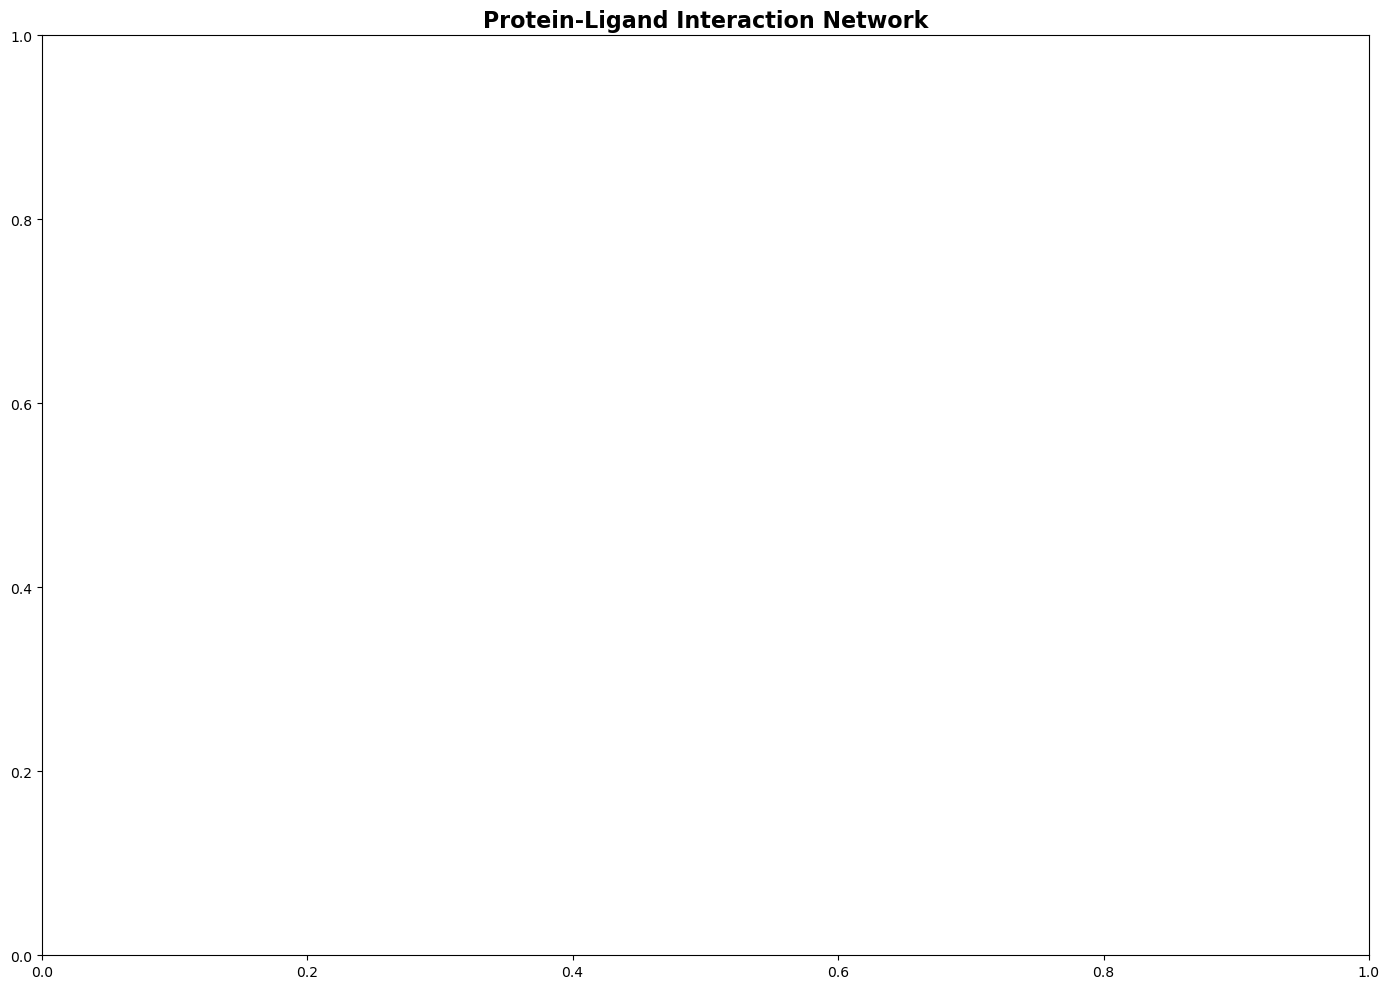


🎉 SUCCESS! Analysis completed and images saved.
📁 Check your working directory for the following files:
   • *.png files (high resolution images)
   • *.pdf files (vector format)
✓ Interaction data saved to interaction_data.csv


In [9]:
import prolif as plf
import MDAnalysis as mda
import matplotlib.pyplot as plt
import pandas as pd

print("Starting ProLIF analysis...")

# Load the protein structure
protein = mda.Universe("/Users/danielcondetorres/Desktop/GUARDA_PROYECTO/MMDR/Code/Output_Carlos/experiment_33_docking_files/3DKO.pdb") 

# Select the protein atoms
protein_atoms = protein.select_atoms("protein")

# Modify the residue identifiers
valor_constante = 0
for residuo in protein_atoms.residues:
    residuo.resid += valor_constante

# Create the ProLIF Molecule object (FIXED: NoImplicit=False)
protein_plf = plf.Molecule.from_mda(protein, NoImplicit=False)
print("✓ Protein molecule created successfully")

# Load the ligand poses from the SDF file
poses_plf = plf.sdf_supplier("/Users/danielcondetorres/Desktop/GUARDA_PROYECTO/MMDR/Code/Output_Carlos/experiment_33_docking_files/Abemaciclib.sdf")
print(f"✓ Loaded {len(poses_plf)} ligand poses")

# Initialize the ProLIF Fingerprint
fp = plf.Fingerprint(count=True, vicinity_cutoff=6.0)

# Generate the interaction fingerprint
fp.run_from_iterable(poses_plf, protein_plf)
print("✓ Interaction fingerprints generated")

# Try multiple methods to create the network plot
print("\nAttempting to create interaction network plot...")

# METHOD 1: Try the most common working approach
success = False
try:
    from prolif.plotting.network import LigNetwork
    
    # Create network with lower threshold to ensure interactions are found
    lignetwork = LigNetwork.from_fingerprint(
        fp,
        ligand_mol=poses_plf[0],
        kind="frame",
        frame=0,
        display_all=False,
        threshold=0.1  # Very low threshold
    )
    
    # Create the plot
    plt.figure(figsize=(14, 10))
    
    # Try different plotting methods
    plot_methods = [
        ('show', lambda: lignetwork.show()),
        ('plot', lambda: lignetwork.plot()),
        ('display', lambda: lignetwork.display())
    ]
    
    for method_name, method_func in plot_methods:
        try:
            print(f"Trying {method_name}() method...")
            result = method_func()
            
            plt.title("Protein-Ligand Interaction Network", fontsize=16, fontweight='bold')
            plt.tight_layout()
            
            # Save the plot with high quality
            filename_png = f"interaction_network_{method_name}.png"
            filename_pdf = f"interaction_network_{method_name}.pdf"
            
            plt.savefig(filename_png, dpi=300, bbox_inches='tight', facecolor='white')
            plt.savefig(filename_pdf, bbox_inches='tight', facecolor='white')
            
            print(f"✓ Network plot saved as {filename_png} and {filename_pdf}")
            plt.show()
            
            success = True
            break
            
        except Exception as e:
            print(f"✗ {method_name}() failed: {e}")
            continue
    
except Exception as e:
    print(f"✗ LigNetwork approach failed: {e}")

# METHOD 2: Direct fingerprint plotting with correct parameters
if not success:
    print("\nTrying direct fingerprint plotting...")
    try:
        plt.figure(figsize=(14, 10))
        
        # Try different parameter combinations
        plot_attempts = [
            lambda: fp.plot_lignetwork(ligand_mol=poses_plf[0], frame=0),
            lambda: fp.plot_lignetwork(poses_plf[0], frame=0),
            lambda: fp.plot_lignetwork(ligand_mol=poses_plf[0], kind="frame", frame=0),
            lambda: fp.plot_lignetwork(poses_plf[0])
        ]
        
        for i, plot_func in enumerate(plot_attempts):
            try:
                print(f"Trying plot attempt {i+1}...")
                plot_func()
                
                plt.title("Protein-Ligand Interaction Network", fontsize=16, fontweight='bold')
                plt.tight_layout()
                
                # Save the successful plot
                plt.savefig("interaction_network_direct.png", dpi=300, bbox_inches='tight', facecolor='white')
                plt.savefig("interaction_network_direct.pdf", bbox_inches='tight', facecolor='white')
                
                print("✓ Direct network plot saved as interaction_network_direct.png and .pdf")
                plt.show()
                
                success = True
                break
                
            except Exception as e:
                print(f"✗ Plot attempt {i+1} failed: {e}")
                continue
                
    except Exception as e:
        print(f"✗ Direct plotting setup failed: {e}")

# METHOD 3: Create custom visualization if network plots fail
if not success:
    print("\nCreating custom interaction visualization...")
    try:
        # Get interaction data
        df = fp.to_dataframe()
        pose_data = df.loc[0] if len(df) > 0 else df
        
        if pose_data.sum().sum() > 0:
            # Create a comprehensive visualization
            fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
            
            # 1. Interaction heatmap
            interactions_summary = pose_data.sum()
            active_interactions = interactions_summary[interactions_summary > 0].sort_values(ascending=False)
            
            if len(active_interactions) > 0:
                # Heatmap of top interactions
                top_interactions = active_interactions.head(20)
                bars1 = ax1.bar(range(len(top_interactions)), top_interactions.values, 
                               color=plt.cm.viridis(np.linspace(0, 1, len(top_interactions))))
                ax1.set_title('Top 20 Protein-Ligand Interactions', fontweight='bold')
                ax1.set_xlabel('Protein Residue - Interaction Type')
                ax1.set_ylabel('Interaction Count')
                ax1.set_xticks(range(len(top_interactions)))
                ax1.set_xticklabels([f"{res}-{int_type}" for res, int_type in top_interactions.index], 
                                   rotation=45, ha='right')
                
                # 2. Interaction types distribution
                interaction_types = {}
                for (res, int_type), count in active_interactions.items():
                    if int_type not in interaction_types:
                        interaction_types[int_type] = 0
                    interaction_types[int_type] += count
                
                ax2.pie(interaction_types.values(), labels=interaction_types.keys(), autopct='%1.1f%%')
                ax2.set_title('Distribution of Interaction Types', fontweight='bold')
                
                # 3. Residue participation
                residue_counts = {}
                for (res, int_type), count in active_interactions.items():
                    if res not in residue_counts:
                        residue_counts[res] = 0
                    residue_counts[res] += count
                
                top_residues = sorted(residue_counts.items(), key=lambda x: x[1], reverse=True)[:15]
                bars3 = ax3.bar([str(res) for res, count in top_residues], 
                               [count for res, count in top_residues],
                               color=plt.cm.plasma(np.linspace(0, 1, len(top_residues))))
                ax3.set_title('Top 15 Most Active Residues', fontweight='bold')
                ax3.set_xlabel('Protein Residue')
                ax3.set_ylabel('Total Interactions')
                ax3.tick_params(axis='x', rotation=45)
                
                # 4. Summary text
                ax4.axis('off')
                summary_text = f"""
INTERACTION ANALYSIS SUMMARY

Total Interactions: {pose_data.sum().sum()}
Active Residues: {len(residue_counts)}
Interaction Types: {len(interaction_types)}

Top 5 Interactions:
"""
                for i, ((res, int_type), count) in enumerate(active_interactions.head(5).items()):
                    summary_text += f"{i+1}. {res}-{int_type}: {count}\n"
                
                ax4.text(0.1, 0.9, summary_text, fontsize=12, verticalalignment='top',
                        bbox=dict(boxstyle="round,pad=0.5", facecolor="lightgray"))
            else:
                # No interactions found
                for ax in [ax1, ax2, ax3, ax4]:
                    ax.text(0.5, 0.5, 'No interactions found\nTry lowering the threshold', 
                           ha='center', va='center', fontsize=14)
                    ax.set_xlim(0, 1)
                    ax.set_ylim(0, 1)
            
            plt.suptitle('Protein-Ligand Interaction Analysis', fontsize=16, fontweight='bold')
            plt.tight_layout()
            
            # Save the comprehensive analysis
            plt.savefig("comprehensive_interaction_analysis.png", dpi=300, bbox_inches='tight', facecolor='white')
            plt.savefig("comprehensive_interaction_analysis.pdf", bbox_inches='tight', facecolor='white')
            
            print("✓ Comprehensive analysis saved as comprehensive_interaction_analysis.png and .pdf")
            plt.show()
            
            success = True
        else:
            print("⚠ No interactions detected. Try lowering the vicinity_cutoff or check your input files.")
            
    except Exception as e:
        print(f"✗ Custom visualization failed: {e}")

# Final status
if success:
    print(f"\n{'='*60}")
    print("🎉 SUCCESS! Analysis completed and images saved.")
    print("📁 Check your working directory for the following files:")
    print("   • *.png files (high resolution images)")
    print("   • *.pdf files (vector format)")
    print(f"{'='*60}")
else:
    print(f"\n{'='*60}")
    print("⚠ Visualization failed, but fingerprint analysis was successful.")
    print("💡 You can still access the interaction data programmatically:")
    print("   df = fp.to_dataframe()")
    print("   print(df.head())")
    print(f"{'='*60}")

# Always try to save the data
try:
    df = fp.to_dataframe()
    df.to_csv("interaction_data.csv")
    print("✓ Interaction data saved to interaction_data.csv")
except:
    print("✗ Could not save interaction data to CSV")

In [ ]:

view = fp.plot_3d(
    poses_plf[pose_index], protein_plf, frame=pose_index, display_all=False
)


view